In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Set the input size according to your model architecture
img_width, img_height = 224, 224

# Set batch size and number of epochs
batch_size = 32
epochs = 15

# Define the path to your dataset
dataset_path = r"/content/drive/MyDrive/Data"

# Define data generators for training and validation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,  # 20% of the data will be used for validation
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="binary",
    subset="training",  # Specify that this is the training set
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="binary",
    subset="validation",  # Specify that this is the validation set
)

# Define the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
)

# Save the trained model
model.save("face_mask_detection_model.h5")

print("Training complete. Model saved as 'face_mask_detection_model.h5'.")


Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                    

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


188/188 [==============================] - 1044s 6s/step - loss: 0.3811 - accuracy: 0.8426 - val_loss: 0.2228 - val_accuracy: 0.9222
Epoch 2/15
188/188 [==============================] - 140s 745ms/step - loss: 0.2469 - accuracy: 0.8992 - val_loss: 0.1960 - val_accuracy: 0.9335
Epoch 3/15
188/188 [==============================] - 136s 727ms/step - loss: 0.2231 - accuracy: 0.9057 - val_loss: 0.1930 - val_accuracy: 0.9322
Epoch 4/15
188/188 [==============================] - 140s 745ms/step - loss: 0.1994 - accuracy: 0.9167 - val_loss: 0.2183 - val_accuracy: 0.9249
Epoch 5/15
188/188 [==============================] - 120s 639ms/step - loss: 0.1895 - accuracy: 0.9275 - val_loss: 0.1668 - val_accuracy: 0.9435
Epoch 6/15
188/188 [==============================] - 119s 633ms/step - loss: 0.1705 - accuracy: 0.9336 - val_loss: 0.1932 - val_accuracy: 0.9269
Epoch 7/15
188/188 [==============================] - 120s 638ms/step - loss: 0.1545 - accuracy: 0.9396 - val_loss: 0.1757 - val_accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training complete. Model saved as 'face_mask_detection_model.h5'.


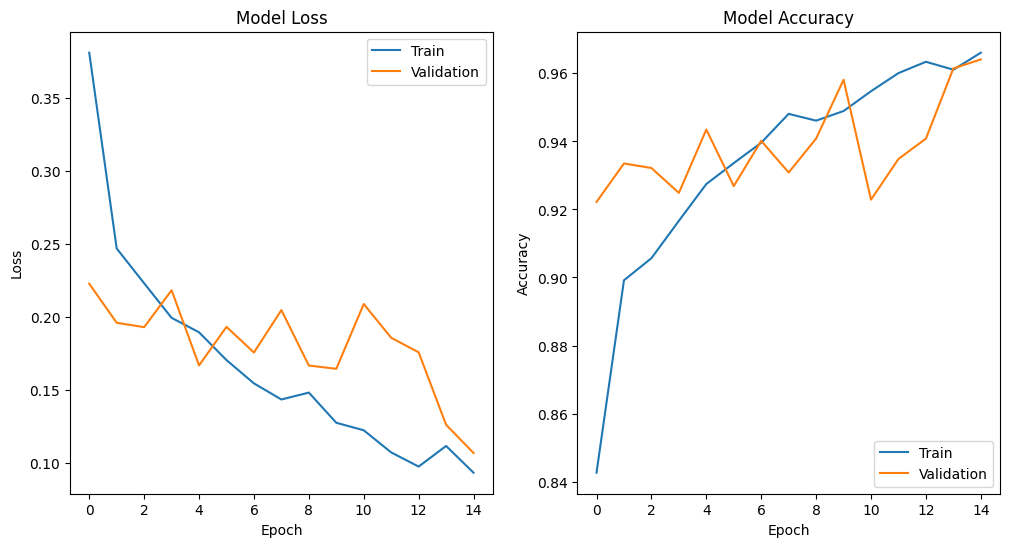

In [ ]:
import matplotlib.pyplot as plt



# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()


In [ ]:
# Save the model
model.save("/content/drive/MyDrive/mask_model.h5")
